## Import relevant modules, data and functions

In [1]:
import numpy as np
import rasterio as rs
import matplotlib.pyplot as plt
from numpy import loadtxt
from osgeo import gdal, gdalconst
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.ensemble import IsolationForest
from sklearn import svm
#import earthpy.spatial as es
#import earthpy.plot as ep
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#Import Imagery
asi = 'Input/Imagery/SingleDateImage_Amsterdam.tif'
ami = 'Input/Imagery/MedianImage_Amsterdam.tif'
msi = 'Input/Imagery/SingleDateImage_Milano.tif'
mmi = 'Input/Imagery/MedianImage_Milano.tif'
bsi = 'Input/Imagery/SingleDateImage_Budapest.tif'
bmi = 'Input/Imagery/MedianImage_Budapest.tif'
#Import Feature extraction
EMPas = np.load('D:/Thesis/Notebooks/Output/Full/EMP/empasi.npy')
NDWIas = loadtxt('D:/Thesis/Notebooks/Output/Full/NDWI/ndwiasi.csv', delimiter=',')
NDVIas = loadtxt('D:/Thesis/Notebooks/Output/Full/NDVI/ndviasi.csv', delimiter=',')
EMPam = np.load('D:/Thesis/Notebooks/Output/Full/EMP/empami.npy')
NDWIam = loadtxt('D:/Thesis/Notebooks/Output/Full/NDWI/ndwiami.csv', delimiter=',')
NDVIam = loadtxt('D:/Thesis/Notebooks/Output/Full/NDVI/ndviami.csv', delimiter=',')
EMPms = np.load('D:/Thesis/Notebooks/Output/Full/EMP/empmsi.npy')
NDWIms = loadtxt('D:/Thesis/Notebooks/Output/Full/NDWI/ndwimsi.csv', delimiter=',')
NDVIms = loadtxt('D:/Thesis/Notebooks/Output/Full/NDVI/ndvimsi.csv', delimiter=',')
EMPmm = np.load('D:/Thesis/Notebooks/Output/Full/EMP/empmmi.npy')
NDWImm = loadtxt('D:/Thesis/Notebooks/Output/Full/NDWI/ndwimmi.csv', delimiter=',')
NDVImm = loadtxt('D:/Thesis/Notebooks/Output/Full/NDVI/ndvimmi.csv', delimiter=',')
EMPbs = np.load('D:/Thesis/Notebooks/Output/Full/EMP/empbsi.npy')
NDWIbs = loadtxt('D:/Thesis/Notebooks/Output/Full/NDWI/ndwibsi.csv', delimiter=',')
NDVIbs = loadtxt('D:/Thesis/Notebooks/Output/Full/NDVI/ndvibsi.csv', delimiter=',')
EMPbm = np.load('D:/Thesis/Notebooks/Output/Full/EMP/empbmi.npy')
NDWIbm = loadtxt('D:/Thesis/Notebooks/Output/Full/NDWI/ndwibmi.csv', delimiter=',')
NDVIbm = loadtxt('D:/Thesis/Notebooks/Output/Full/NDVI/ndvibmi.csv', delimiter=',')
#Import Twitter
Twita = rs.open('Input/Twitter/TwitterRaster_Amsterdam_fe.tif','r').read()
Twita = np.transpose(Twita, [1, 2, 0])
Twita = Twita[:,:,0]
Twitm = rs.open('Input/Twitter/TwitterRaster_Milano.tif','r').read()
Twitm = np.transpose(Twitm, [1, 2, 0])
Twitm = Twitm[:,:,0]
Twitb = rs.open('Input/Twitter/TwitterRaster_Budapest_fe.tif','r').read()
Twitb = np.transpose(Twitb, [1, 2, 0])
Twitb = Twitb[:,:,0]
#Import Validation datasets
Vala = rs.open('Input/Validation/Validation_30m_Amsterdam_fi.tif','r').read()
Vala = np.transpose(Vala, [1, 2, 0])
Val30ma = Vala[:,:,0]
Val30ma = np.where(Val30ma==2, 1, 0)
Val30ma = Val30ma.flatten()
Val2a = rs.open('Input/Validation/Validation_GAIA_Amsterdam_fi.tif','r').read()
Val2a = np.transpose(Val2a, [1, 2, 0])
Val2GAIAa = Val2a[:,:,0]
Val2GAIAa = np.where(Val2GAIAa>0, 1, 0)
Val2GAIAa = Val2GAIAa.flatten()
Val3a = rs.open('Input/Validation/Validation_GHS_Amsterdam_fi.tif', 'r').read()
Val3a = np.transpose(Val3a, [1, 2, 0])
Val3GHSa = Val3a[:,:,0]
Val3GHS50a = np.where(Val3GHSa>50, 1, 0)
Val3GHS50a = Val3GHS50a.flatten()
Valm = rs.open('Input/Validation/Validation_30m_Milano_fi.tif','r').read()
Valm = np.transpose(Valm, [1, 2, 0])
Val30mm = Valm[:,:,0]
Val30mm = np.where(Val30mm==2, 1, 0)
Val30mm = Val30mm.flatten()
Val2m = rs.open('Input/Validation/Validation_GAIA_Milano_fi.tif','r').read()
Val2m = np.transpose(Val2m, [1, 2, 0])
Val2GAIAm = Val2m[:,:,0]
Val2GAIAm = np.where(Val2GAIAm>0, 1, 0)
Val2GAIAm = Val2GAIAm.flatten()
Val3m = rs.open('Input/Validation/Validation_GHS_Milano_fi.tif', 'r').read()
Val3m = np.transpose(Val3m, [1, 2, 0])
Val3GHSm = Val3m[:,:,0]
Val3GHS50m = np.where(Val3GHSm>50, 1, 0)
Val3GHS50m = Val3GHS50m.flatten()
Valb = rs.open('Input/Validation/Validation_30m_Budapest_fi.tif','r').read()
Valb = np.transpose(Valb, [1, 2, 0])
Val30mb = Valb[:,:,0]
Val30mb = np.where(Val30mb==2, 1, 0)
Val30mb = Val30mb.flatten()
Val2b = rs.open('Input/Validation/Validation_GAIA_Budapest_fi.tif','r').read()
Val2b = np.transpose(Val2b, [1, 2, 0])
Val2GAIAb = Val2b[:,:,0]
Val2GAIAb = np.where(Val2GAIAb>0, 1, 0)
Val2GAIAb = Val2GAIAb.flatten()
Val3b = rs.open('Input/Validation/Validation_GHS_Budapest_fi.tif', 'r').read()
Val3b = np.transpose(Val3b, [1, 2, 0])
Val3GHSb = Val3b[:,:,0]
Val3GHS50b = np.where(Val3GHSb>50, 1, 0)
Val3GHS50b = Val3GHS50b.flatten()

In [3]:
#Plot Image
def read_data_EMP(inras):
    # Read data
    img = gdal.Open(inras, gdal.GA_ReadOnly) 
    bands = [img.GetRasterBand(i).ReadAsArray() for i in range(1, img.RasterCount + 1)]
    img = np.array(bands)
    img = img[0:12,:,:]
    img = np.transpose(img, [1, 2, 0])
    img_rgbnir = img[:,:,[3,2,1,7]]
    return img_rgbnir
def MyNormalize(img_i,sigma):
        nr,nc,nb = img_i.shape
        img_n = np.zeros(shape=(nr,nc,nb))
        for i in range(0,nb):
            one_band = img_i[:,:,i]
            mi = np.min(one_band)
            ma = np.max(one_band)
            one_band = (one_band-mi)/(ma-mi+np.finfo(float).eps)
            img_n[:,:,i] = sigma*one_band
        return img_n 

In [4]:
%%time
from numpy import *
GLCM_ASI_load = loadtxt('D:/Thesis/Notebooks/Output/Full/GLCM/ASI/GLCM_ASI.csv', delimiter=',')
img = read_data_EMP(asi)
nr, nc, nb = img.shape
nf = 16
GLCMas = GLCM_ASI_load.reshape(nr,nc,nf)
where_are_NaNs = isnan(GLCMas)
GLCMas[where_are_NaNs] = 0

GLCM_AMI_load = loadtxt('D:/Thesis/Notebooks/Output/Full/GLCM/AMI/GLCM_AMI.csv', delimiter=',')
img = read_data_EMP(ami)
nr, nc, nb = img.shape
nf = 16
GLCMam = GLCM_AMI_load.reshape(nr,nc,nf)
where_are_NaNs = isnan(GLCMam)
GLCMam[where_are_NaNs] = 0


Wall time: 17min 18s


In [5]:
%%time
GLCM_MSI_load = loadtxt('D:/Thesis/Notebooks/Output/Full/GLCM/MSI/GLCM_MSI.csv', delimiter=',')
img = read_data_EMP(msi)
nr, nc, nb = img.shape
nf = 16
GLCMms = GLCM_MSI_load.reshape(nr,nc,nf)
where_are_NaNs = isnan(GLCMms)
GLCMms[where_are_NaNs] = 0

GLCM_MMI_load = loadtxt('D:/Thesis/Notebooks/Output/Full/GLCM/MMI/GLCM_MMI.csv', delimiter=',')
img = read_data_EMP(mmi)
nr, nc, nb = img.shape
nf = 16
GLCMmm = GLCM_MMI_load.reshape(nr,nc,nf)
where_are_NaNs = isnan(GLCMmm)
GLCMmm[where_are_NaNs] = 0

Wall time: 9min 31s


In [6]:
%%time
GLCM_BSI_load = loadtxt('D:/Thesis/Notebooks/Output/Full/GLCM/BSI/GLCM_BSI.csv', delimiter=',')
img = read_data_EMP(bsi)
nr, nc, nb = img.shape
nf = 16
GLCMbs = GLCM_BSI_load.reshape(nr,nc,nf)
where_are_NaNs = isnan(GLCMbs)
GLCMbs[where_are_NaNs] = 0

GLCM_BMI_load = loadtxt('D:/Thesis/Notebooks/Output/Full/GLCM//BMI/GLCM_BMI.csv', delimiter=',')
img = read_data_EMP(bmi)
nr, nc, nb = img.shape
nf = 16
GLCMbm = GLCM_BMI_load.reshape(nr,nc,nf)
where_are_NaNs = isnan(GLCMbm)
GLCMbm[where_are_NaNs] = 0

Wall time: 51min 14s


## Analyse effect of extracted features

In [57]:
img = read_data_EMP(msi)
#stack = np.concatenate((img, EMPbs), axis=2)
#stacked = np.dstack((stack, NDVIbs, NDWIbs))
#Setup for IF and OCSVM
X = img
Ytr1 = Twitm
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X)

model = IsolationForest(n_estimators = 130)
model.fit(Xtr)
yhat = model.score_samples(X)
params = model.get_params(deep=True)
yhat1 = (yhat-min(yhat))/(max(yhat)-min(yhat))
class_map1 = np.reshape(yhat1,(nr,nc))

if_outall_msi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_IF/if_outall_msi.csv', class_map1, delimiter=',')

In [8]:
img = read_data_EMP(bsi)
stack = np.concatenate((img, EMPbs, GLCMbs), axis=2)
stacked = np.dstack((stack, NDVIbs))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twitb
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X)

model = IsolationForest(n_estimators = 70)
model.fit(Xtr)
yhat = model.score_samples(X)
params = model.get_params(deep=True)
yhat1 = (yhat-min(yhat))/(max(yhat)-min(yhat))
class_map1 = np.reshape(yhat1,(nr,nc))

if_outndwi_bsi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_IF/if_outndwi_bsi.csv', class_map1, delimiter=',')

In [9]:
img = read_data_EMP(bsi)
stack = np.concatenate((img, EMPbs, GLCMbs), axis=2)
stacked = np.dstack((stack, NDWIbs))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twitb
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X)

model = IsolationForest(n_estimators = 70)
model.fit(Xtr)
yhat = model.score_samples(X)
params = model.get_params(deep=True)
yhat1 = (yhat-min(yhat))/(max(yhat)-min(yhat))
class_map1 = np.reshape(yhat1,(nr,nc))

if_outndvi_bsi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_IF/if_outndvi_bsi.csv', class_map1, delimiter=',')

In [10]:
img = read_data_EMP(bsi)
stack = np.concatenate((img, GLCMbs), axis=2)
stacked = np.dstack((stack, NDVIbs, NDWIbs))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twitb
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X) 

model = IsolationForest(n_estimators = 70)
model.fit(Xtr)
yhat = model.score_samples(X)
params = model.get_params(deep=True)
yhat1 = (yhat-min(yhat))/(max(yhat)-min(yhat))
class_map1 = np.reshape(yhat1,(nr,nc))

if_outemp_bsi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_IF/if_outemp_bsi.csv', class_map1, delimiter=',')

## Run Isolation Forest (Opt settings)

In [ ]:
img = read_data_EMP(asi)
stack = np.concatenate((img, EMPas, GLCMas), axis=2)
stacked = np.dstack((stack, NDVIas, NDWIas))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twita
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X) 

In [ ]:
%%time
#IF
model = IsolationForest(n_estimators = 50)
model.fit(Xtr)
yhat = model.score_samples(X)
params = model.get_params(deep=True)
yhat1 = (yhat-min(yhat))/(max(yhat)-min(yhat))
class_map1 = np.reshape(yhat1,(nr,nc))

In [ ]:
if_opt_asi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_IF/if_opt_asi.csv', class_map1, delimiter=',')

In [ ]:
img = read_data_EMP(ami)
stack = np.concatenate((img, EMPam, GLCMam), axis=2)
stacked = np.dstack((stack, NDVIam, NDWIam))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twita
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X) 

In [ ]:
%%time
#IF
model = IsolationForest(n_estimators = 50)
model.fit(Xtr)
yhat = model.score_samples(X)
params = model.get_params(deep=True)
yhat1 = (yhat-min(yhat))/(max(yhat)-min(yhat))
class_map1 = np.reshape(yhat1,(nr,nc))

In [ ]:
if_opt_ami = np.savetxt('D:/Thesis/Notebooks/Output/Full/_IF/if_opt_ami.csv', class_map1, delimiter=',')

In [ ]:
img = read_data_EMP(msi)
stack = np.concatenate((img, EMPms, GLCMms), axis=2)
stacked = np.dstack((stack, NDVIms, NDWIms))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twitm
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X) 

In [ ]:
%%time
#IF
model = IsolationForest(n_estimators = 130)
model.fit(Xtr)
yhat = model.score_samples(X)
params = model.get_params(deep=True)
yhat1 = (yhat-min(yhat))/(max(yhat)-min(yhat))
class_map1 = np.reshape(yhat1,(nr,nc))

In [ ]:
if_opt_msi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_IF/if_opt_msi.csv', class_map1, delimiter=',')

In [ ]:
img = read_data_EMP(mmi)
stack = np.concatenate((img, EMPmm, GLCMmm), axis=2)
stacked = np.dstack((stack, NDVImm, NDWImm))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twitm
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X) 

In [ ]:
%%time
#IF
model = IsolationForest(n_estimators = 130)
model.fit(Xtr)
yhat = model.score_samples(X)
params = model.get_params(deep=True)
yhat1 = (yhat-min(yhat))/(max(yhat)-min(yhat))
class_map1 = np.reshape(yhat1,(nr,nc))

In [ ]:
if_opt_mmi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_IF/if_opt_mmi.csv', class_map1, delimiter=',')

In [133]:
img = read_data_EMP(bsi)
stack = np.concatenate((img, EMPbs, GLCMbs), axis=2)
stacked = np.dstack((stack, NDVIbs, NDWIbs))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twitb
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X) 

In [134]:
%%time
#IF
model = IsolationForest(n_estimators = 70)
model.fit(Xtr)
yhat = model.score_samples(X)
params = model.get_params(deep=True)
yhat1 = (yhat-min(yhat))/(max(yhat)-min(yhat))
class_map1 = np.reshape(yhat1,(nr,nc))

Wall time: 6min 32s


In [135]:
if_opt_bsi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_IF/if_opt_bsi.csv', class_map1, delimiter=',')

In [136]:
img = read_data_EMP(bmi)
stack = np.concatenate((img, EMPbm, GLCMbm), axis=2)
stacked = np.dstack((stack, NDVIbm, NDWIbm))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twitb
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X) 

In [137]:
%%time
#IF
model = IsolationForest(n_estimators = 70)
model.fit(Xtr)
yhat = model.score_samples(X)
params = model.get_params(deep=True)
yhat1 = (yhat-min(yhat))/(max(yhat)-min(yhat))
class_map1 = np.reshape(yhat1,(nr,nc))

Wall time: 6min 22s


In [138]:
if_opt_bmi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_IF/if_opt_bmi.csv', class_map1, delimiter=',')

## Run SVM (Optimal settings)

In [97]:
img = read_data_EMP(asi)
stack = np.concatenate((img, EMPas, GLCMas), axis=2)
stacked = np.dstack((stack, NDVIas, NDWIas))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twita
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X) 

In [98]:
%%time
#OCSVM
model = svm.OneClassSVM(kernel = 'rbf', nu = 0.5)
model.fit(Xtr)
yhat2 = model.score_samples(X)
yhat3 = (yhat2-min(yhat2))/(max(yhat2)-min(yhat2))
class_map2 = np.reshape(yhat3,(nr,nc))

Wall time: 23min 26s


In [99]:
svm_opt_asi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_opt_asi.csv', class_map2, delimiter=',')

In [100]:
img = read_data_EMP(ami)
stack = np.concatenate((img, EMPam, GLCMam), axis=2)
stacked = np.dstack((stack, NDVIam, NDWIam))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twita
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X) 

In [101]:
%%time
#OCSVM
model = svm.OneClassSVM(kernel = 'rbf', nu = 0.4)
model.fit(Xtr)
yhat2 = model.score_samples(X)
yhat3 = (yhat2-min(yhat2))/(max(yhat2)-min(yhat2))
class_map2 = np.reshape(yhat3,(nr,nc))

Wall time: 18min 49s


In [102]:
svm_opt_ami = np.savetxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_opt_ami.csv', class_map2, delimiter=',')

In [103]:
img = read_data_EMP(msi)
stack = np.concatenate((img, EMPms,GLCMms), axis=2)
stacked = np.dstack((stack, NDVIms, NDWIms))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twitm
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X) 

In [104]:
%%time
#OCSVM
model = svm.OneClassSVM(kernel = 'rbf', nu = 0.4)
model.fit(Xtr)
yhat2 = model.score_samples(X)
yhat3 = (yhat2-min(yhat2))/(max(yhat2)-min(yhat2))
class_map2 = np.reshape(yhat3,(nr,nc))

Wall time: 4min 40s


In [105]:
svm_opt_msi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_opt_msi.csv', class_map2, delimiter=',')

In [106]:
img = read_data_EMP(mmi)
stack = np.concatenate((img, EMPmm, GLCMmm), axis=2)
stacked = np.dstack((stack, NDVImm, NDWImm))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twitm
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X) 

In [107]:
%%time
#OCSVM
model = svm.OneClassSVM(kernel = 'rbf', nu = 0.5)
model.fit(Xtr)
yhat2 = model.score_samples(X)
yhat3 = (yhat2-min(yhat2))/(max(yhat2)-min(yhat2))
class_map2 = np.reshape(yhat3,(nr,nc))

Wall time: 5min 46s


In [108]:
svm_opt_mmi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_opt_mmi.csv', class_map2, delimiter=',')

In [109]:
img = read_data_EMP(bsi)
stack = np.concatenate((img, EMPbs, GLCMbs), axis=2)
stacked = np.dstack((stack, NDVIbs, NDWIbs))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twitb
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X) 

In [110]:
%%time
#OCSVM
model = svm.OneClassSVM(kernel = 'rbf', nu = 0.2)
model.fit(Xtr)
yhat2 = model.score_samples(X)
yhat3 = (yhat2-min(yhat2))/(max(yhat2)-min(yhat2))
class_map2 = np.reshape(yhat3,(nr,nc))

Wall time: 3min 56s


In [111]:
svm_opt_bsi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_opt_bsi.csv', class_map2, delimiter=',')

In [114]:
img = read_data_EMP(bmi)
stack = np.concatenate((img, EMPbm, GLCMbm), axis=2)
stacked = np.dstack((stack, NDVIbm, NDWIbm))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twitb
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X) 

In [115]:
%%time
#OCSVM
model = svm.OneClassSVM(kernel = 'rbf', nu = 0.8)
model.fit(Xtr)
yhat2 = model.score_samples(X)
yhat3 = (yhat2-min(yhat2))/(max(yhat2)-min(yhat2))
class_map2 = np.reshape(yhat3,(nr,nc))

Wall time: 14min 15s


In [116]:
svm_opt_bmi = np.savetxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_opt_bmi.csv', class_map2, delimiter=',')

## Load data

In [58]:
#load IF
#if_def_asi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_default_asi.csv', delimiter=',')
#if_opt_asi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_opt_asi.csv', delimiter=',')
#if_def_ami = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_default_ami.csv', delimiter=',')
#if_opt_ami = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_opt_ami.csv', delimiter=',')
#if_def_msi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_default_msi.csv', delimiter=',')
#if_opt_msi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_opt_msi.csv', delimiter=',')
#if_def_mmi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_default_mmi.csv', delimiter=',')
#if_opt_mmi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_opt_mmi.csv', delimiter=',')
#if_def_bsi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_default_bsi.csv', delimiter=',')
#if_opt_bsi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_opt_bsi.csv', delimiter=',')
#if_def_bmi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_default_bmi.csv', delimiter=',')
#if_opt_bmi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_opt_bmi.csv', delimiter=',')

#svm_def_asi = loadtxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_default_asi.csv', delimiter=',')
#svm_opt_asi = loadtxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_opt_asi.csv', delimiter=',')
#svm_def_ami = loadtxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_default_ami.csv', delimiter=',')
#svm_opt_ami = loadtxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_opt_ami.csv', delimiter=',')
#svm_def_msi = loadtxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_default_msi.csv', delimiter=',')
#svm_opt_msi = loadtxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_opt_msi.csv', delimiter=',')
#svm_def_mmi = loadtxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_default_mmi.csv', delimiter=',')
#svm_opt_mmi = loadtxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_opt_mmi.csv', delimiter=',')
#svm_def_bsi = loadtxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_default_bsi.csv', delimiter=',')
#svm_opt_bsi = loadtxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_opt_bsi.csv', delimiter=',')
#svm_def_bmi = loadtxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_default_bmi.csv', delimiter=',')
#svm_opt_bmi = loadtxt('D:/Thesis/Notebooks/Output/Full/_SVM/svm_opt_bmi.csv', delimiter=',')

#if_outemp_asi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_outemp_asi.csv', delimiter=',')
#if_outndvi_ami = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_outndvi_ami.csv', delimiter=',')
#if_outemp_msi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_outemp_msi.csv', delimiter=',')
#if_outndvi_mmi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_outndvi_mmi.csv', delimiter=',')
#if_outemp_bsi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_outemp_bsi.csv', delimiter=',')
#if_outndvi_bmi = loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_outndvi_bmi.csv', delimiter=',')

if_outall_asi = np.loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_outall_asi.csv', delimiter=',')
if_outall_msi = np.loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_outall_msi.csv', delimiter=',')
if_outall_bsi = np.loadtxt('D:/Thesis/Notebooks/Output/Full/_IF/if_outall_bsi.csv', delimiter=',')

## Plot Imagery and calculate accuracy

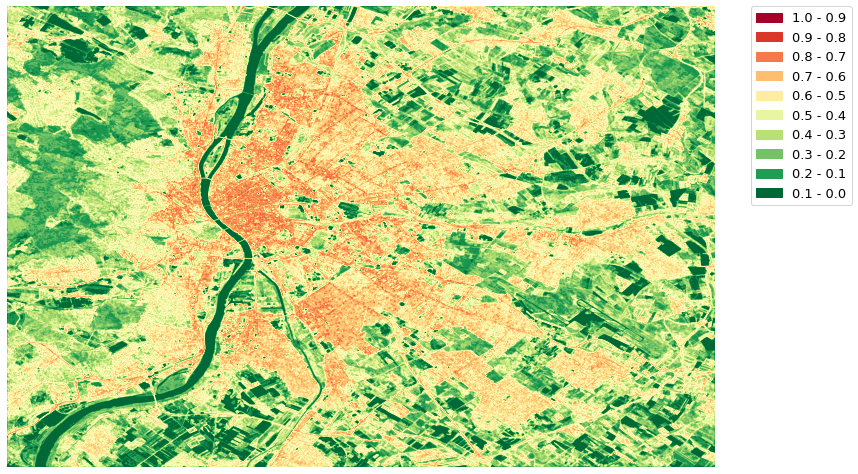

In [163]:
import earthpy.spatial as es
import earthpy.plot as ep
# Create classes and apply to NDVI results
if_class_bins = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0]
if_class = np.digitize(svm_opt_bmi, if_class_bins)

# Apply the nodata mask to the newly classified NDVI data
if_landsat_class = np.ma.masked_where(
    np.ma.getmask(svm_opt_bmi), if_class
)
np.unique(if_class)

# Define color map
#nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
#nbr_cmap = ListedColormap(nbr_colors)

# Define class names
if_cat_names = [
    "1.0 - 0.9",
    "0.9 - 0.8",
    "0.8 - 0.7",
    "0.7 - 0.6",
    "0.6 - 0.5",
    "0.5 - 0.4",
    "0.4 - 0.3",
    "0.3 - 0.2",
    "0.2 - 0.1",
    "0.1 - 0.0"
]

# Get list of classes
classes = np.unique(if_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:10]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(if_class, cmap="RdYlGn")

ep.draw_legend(im_ax=im, classes=classes, titles=if_cat_names)
#ax.set_title(
#    "SVM Anomaly score Amsterdam Single Image",
#    fontsize=20,
#)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [74]:
class_map = if_outall_msi
class_map = np.where(class_map>0.6, 1, 0)
class_map = class_map.flatten()
pred = class_map
true1 = Val30mm
true2 = Val2GAIAm
true3 = Val3GHS50m

In [75]:
cfm1 = confusion_matrix(true1, pred)
TN1,FP1,FN1,TP1= cfm1.ravel()
cfm2 = confusion_matrix(true2, pred)
TN2,FP2,FN2,TP2= cfm2.ravel()
cfm3 = confusion_matrix(true3, pred)
TN3,FP3,FN3,TP3= cfm3.ravel()

AO = (((TP1+TN1)/(TP1+TN1+FP1+FN1))+
      ((TP2+TN2)/(TP2+TN2+FP2+FN2))+
      ((TP3+TN3)/(TP3+TN3+FP3+FN3)))/3

P = ((TP1/(TP1+FP1))+
     (TP2/(TP2+FP2))+
     (TP3/(TP3+FP3)))/3

R = ((TP1/(TP1+FN1))+
     (TP2/(TP2+FN2))+
     (TP3/(TP3+FN3)))/3

F = (((2*TP1)/(2*TP1+FP1+FN1))+
     ((2*TP2)/(2*TP2+FP2+FN2))+
     ((2*TP3)/(2*TP3+FP3+FN3)))/3

auc1 = roc_auc_score(true1,pred)
auc2 = roc_auc_score(true2,pred)
auc3 = roc_auc_score(true3,pred)
score = ((auc1+auc2+auc3)/3)

print('AUC score = ' + str(score))
print('Overall Accuracy = ' + str(AO))
print('Precision = ' + str(P))
print('Recall = ' + str(R))
print('F_score = ' + str(F))

AUC score = 0.5481320576314275
Overall Accuracy = 0.5439292901922261
Precision = 0.5234728507567947
Recall = 0.8689925727692925
F_score = 0.6161303991621723


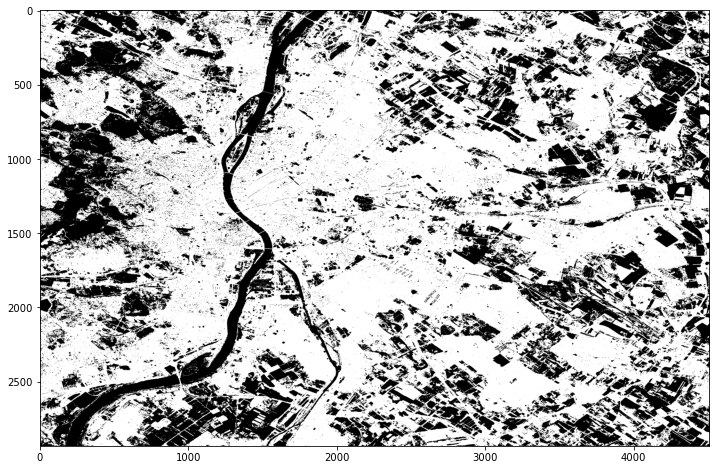

In [179]:
class_map = if_opt_bmi
class_map = np.where(class_map>0.7, 1, 0)
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(class_map, cmap="gray")

## Plot values (default settings)

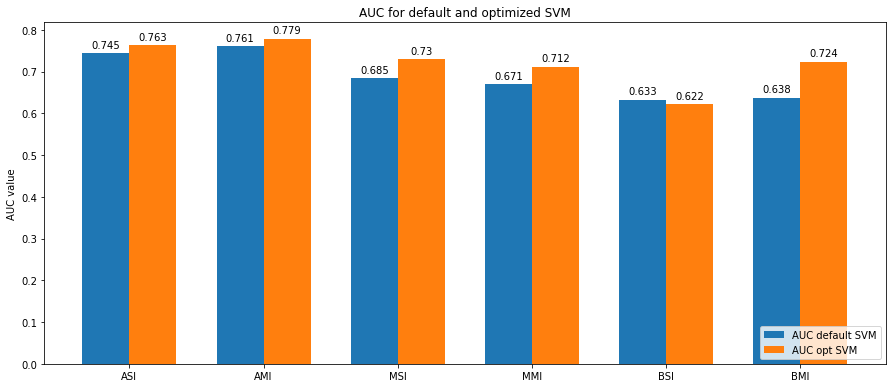

In [2]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['ASI', 'AMI', 'MSI', 'MMI', 'BSI', 'BMI']
defaultscore = [0.745, 0.761, 0.685, 0.671, 0.633, 0.638]
optscore = [0.763, 0.779, 0.730, 0.712, 0.622, 0.724]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 5.5)
rects1 = ax.bar(x - width/2, defaultscore, width, label='AUC default SVM')
rects2 = ax.bar(x + width/2, optscore, width, label='AUC opt SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC value')
ax.set_title('AUC for default and optimized SVM')
ax.set_xticks(x, labels)
ax.legend(loc='lower right')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

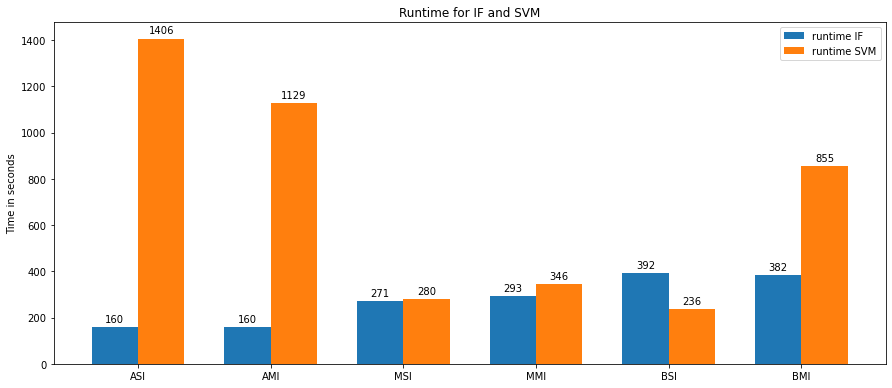

In [170]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['ASI', 'AMI', 'MSI', 'MMI', 'BSI', 'BMI']
ifscore = [160, 160, 271, 293, 392, 382]
svmscore = [1406, 1129, 280, 346, 236, 855]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 5.5)
rects1 = ax.bar(x - width/2, ifscore, width, label='runtime IF')
rects2 = ax.bar(x + width/2, svmscore, width, label='runtime SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time in seconds')
ax.set_title('Runtime for IF and SVM')
ax.set_xticks(x, labels)
ax.legend(loc='upper right')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()